# Codigo Creativo.
## Centro. 
### 5° Semestre.

# App profiles for the App Store and Google Play Store


The aim of the project is to find the mobile apps profiles that are being profitable in the App Store and Google Play markets. We are currently working as a data analyst for a company that develops apps for said markets. Our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

Our company only develops free to use apps, and our main revenue source consists of in-apps ads. This means that our revenue for each apps heavily depends on the number of users that use our app. 

## Opening and exploring the data

Combining the two markets there are approximately over four million apps currently avaliable for download, this means that analyzing said apps would take a tremendous amount of time and resources, so we'll try to analyze a sample of data instead. Luckily for us there exists two data sets that seem suitable for this project: 

- A data set containing data about 10K Android apps from Google Play. DOWNLOAD LINK: https://dq-content.s3.amazonaws.com/350/googleplaystore.csv

- Another data set containing data about 7k IOS apps from the App Store. DOWNLOAD LINK: https://dq-content.s3.amazonaws.com/350/AppleStore.csv


Lets start by importing our libraries, opening the data sets and exploring the data.




In [135]:
import pandas as pd
import matplotlib as plt
import numpy as np

ios = pd.read_csv("AppleStore.csv")
google = pd.read_csv("googleplaystore.csv")



## 1: Google Data Set

We'll begin by analyzing the google data set that is stored in our DataFrame Object 'google' returned by pandas "read_csv" method. 

Lets start by using the 'head()' method to get the first five rows of our DataFrame, and alternatively we'll also use the 'tail()' method to get the last 5 rows of our DataFrame.


In [3]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


<b>How can we analyze the whole DataFrame without printing the whole thing?</b> 

Using pandas 'info()' method enables us to get a quick glance at the whole thing, getting key information in a quick and efficient way.

In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As we can tell from the output above, the 'info()' method gives us information about our DataFrame like: 
- Number of columns
- Column names
- Non-Null Values count. (Non-Empty Values)
- Value Type (Floats64, objects, int)
- Value Type count

## Deleting wrong data

The row 10472 in the Google Play dataset corresponds to the app 'Life Made WI-FI Touchscreen Photo Frame'. If we analyze this row we can tell that it contains a value for the 'rating' column of 19. This should be impossible due to the fact that the maximum rating possible is of 5. 

Lets delete this row using pandas.drop() method:

DOC: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html




In [6]:
google.loc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [136]:
google.drop(google.index[[10472]], inplace= True)

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [137]:
google.isna().sum()
google = google.dropna(axis = 0)
google.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

<b>Checking for duplicate values</b>

We have to check the DataFrama for duplicate values, and adjust the data accordingly.

In [138]:
google['Reviews'] = google['Reviews'].astype('int')
google = google.sort_values(by=['Reviews'], ascending = False)
google.duplicated(['App']).sum()


1170

In [139]:
google = google.drop_duplicates(['App'],keep = 'first')
google.duplicated(['App']).sum()


google.shape


(8190, 13)

### Only english-language apps

In [140]:
def isEnglish(s):
    non_ascii = 0 
    for c in s:
        if ord(c) > 127:
            non_ascii += 1
    if non_ascii > 3:
            return False
    else:
        return True

In [141]:
google['gets_deleted'] = [isEnglish(i) != True for i in google['App']]
    
#google.loc[google['gets_deleted'] == True]
google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,gets_deleted
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,False
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,False
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,False
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,False
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,EC SPORTS,SPORTS,5.0,1,6.3M,10+,Free,0,Everyone,Sports,"May 26, 2015",4.1.1,2.3.3 and up,False
9251,EC Reps,BUSINESS,4.0,1,5.4M,100+,Free,0,Everyone,Business,"March 15, 2017",1.10,4.0 and up,False
7139,CB Register,FAMILY,5.0,1,5.6M,10+,Free,0,Everyone,Entertainment,"June 27, 2018",1.0,4.1 and up,False
7122,CB Fit,HEALTH_AND_FITNESS,5.0,1,7.8M,10+,Free,0,Everyone,Health & Fitness,"July 9, 2018",4.2.2,4.1 and up,False


In [146]:
google = google.drop(google.loc[google['gets_deleted'] == 1].index)
google = google.drop()

In [152]:
google.sort_values(['Rating','Reviews'], ascending = [False, False])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,gets_deleted
10357,Ríos de Fe,LIFESTYLE,5.0,141,15M,"1,000+",Free,0,Everyone,Lifestyle,"March 24, 2018",1.8,4.1 and up,False
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.3M,"1,000+",Free,0,Everyone,Finance,"August 7, 2018",2.1.0,4.1 and up,False
8058,Oración CX,LIFESTYLE,5.0,103,3.8M,"5,000+",Free,0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1 and up,False
6823,Barisal University App-BU Face,FAMILY,5.0,100,10M,"1,000+",Free,0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up,False
9496,Master E.K,FAMILY,5.0,90,Varies with device,"1,000+",Free,0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,MbH BM,MEDICAL,1.0,1,2.3M,100+,Free,0,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up,False
625,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up,False
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up,False
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up,False


In [165]:
google['Type'].unique()

google_free = google.loc[google['Type'] == 'Free']
google_free = google_free.drop(['gets_deleted', 'Type','Price'], axis = 1)
google_free['Genres'].unique()

array(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Adventure', 'Casual;Action & Adventure',
       'Travel & Local', 'Racing', 'Personalization', 'Maps & Navigation',
       'Entertainment', 'Trivia', 'Education;Education', 'Shopping',
       'Productivity', 'Health & Fitness', 'Adventure;Action & Adventure',
       'Simulation', 'Books & Reference', 'Lifestyle', 'Role Playing',
       'Weather', 'Puzzle', 'Casino', 'Card', 'Word',
       'Puzzle;Action & Adventure', 'Sports;Action & Adventure', 'Board',
       'Finance', 'Puzzle;Brain Games', 'Racing;Action & Adventure',
       'Business', 'Education', 'Food & Drink',
       'Educational;Pretend Play', 'Comics', 'Card;Action & Adventure',
       'Music', 'Educational;Action & Adventure', 'Parenting',
       'Simulation;Action & Adventure', 'Role Playing;Action & Adventure',
       'Action;Action & Adventure', 'Datin

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Category', ylabel='count'>

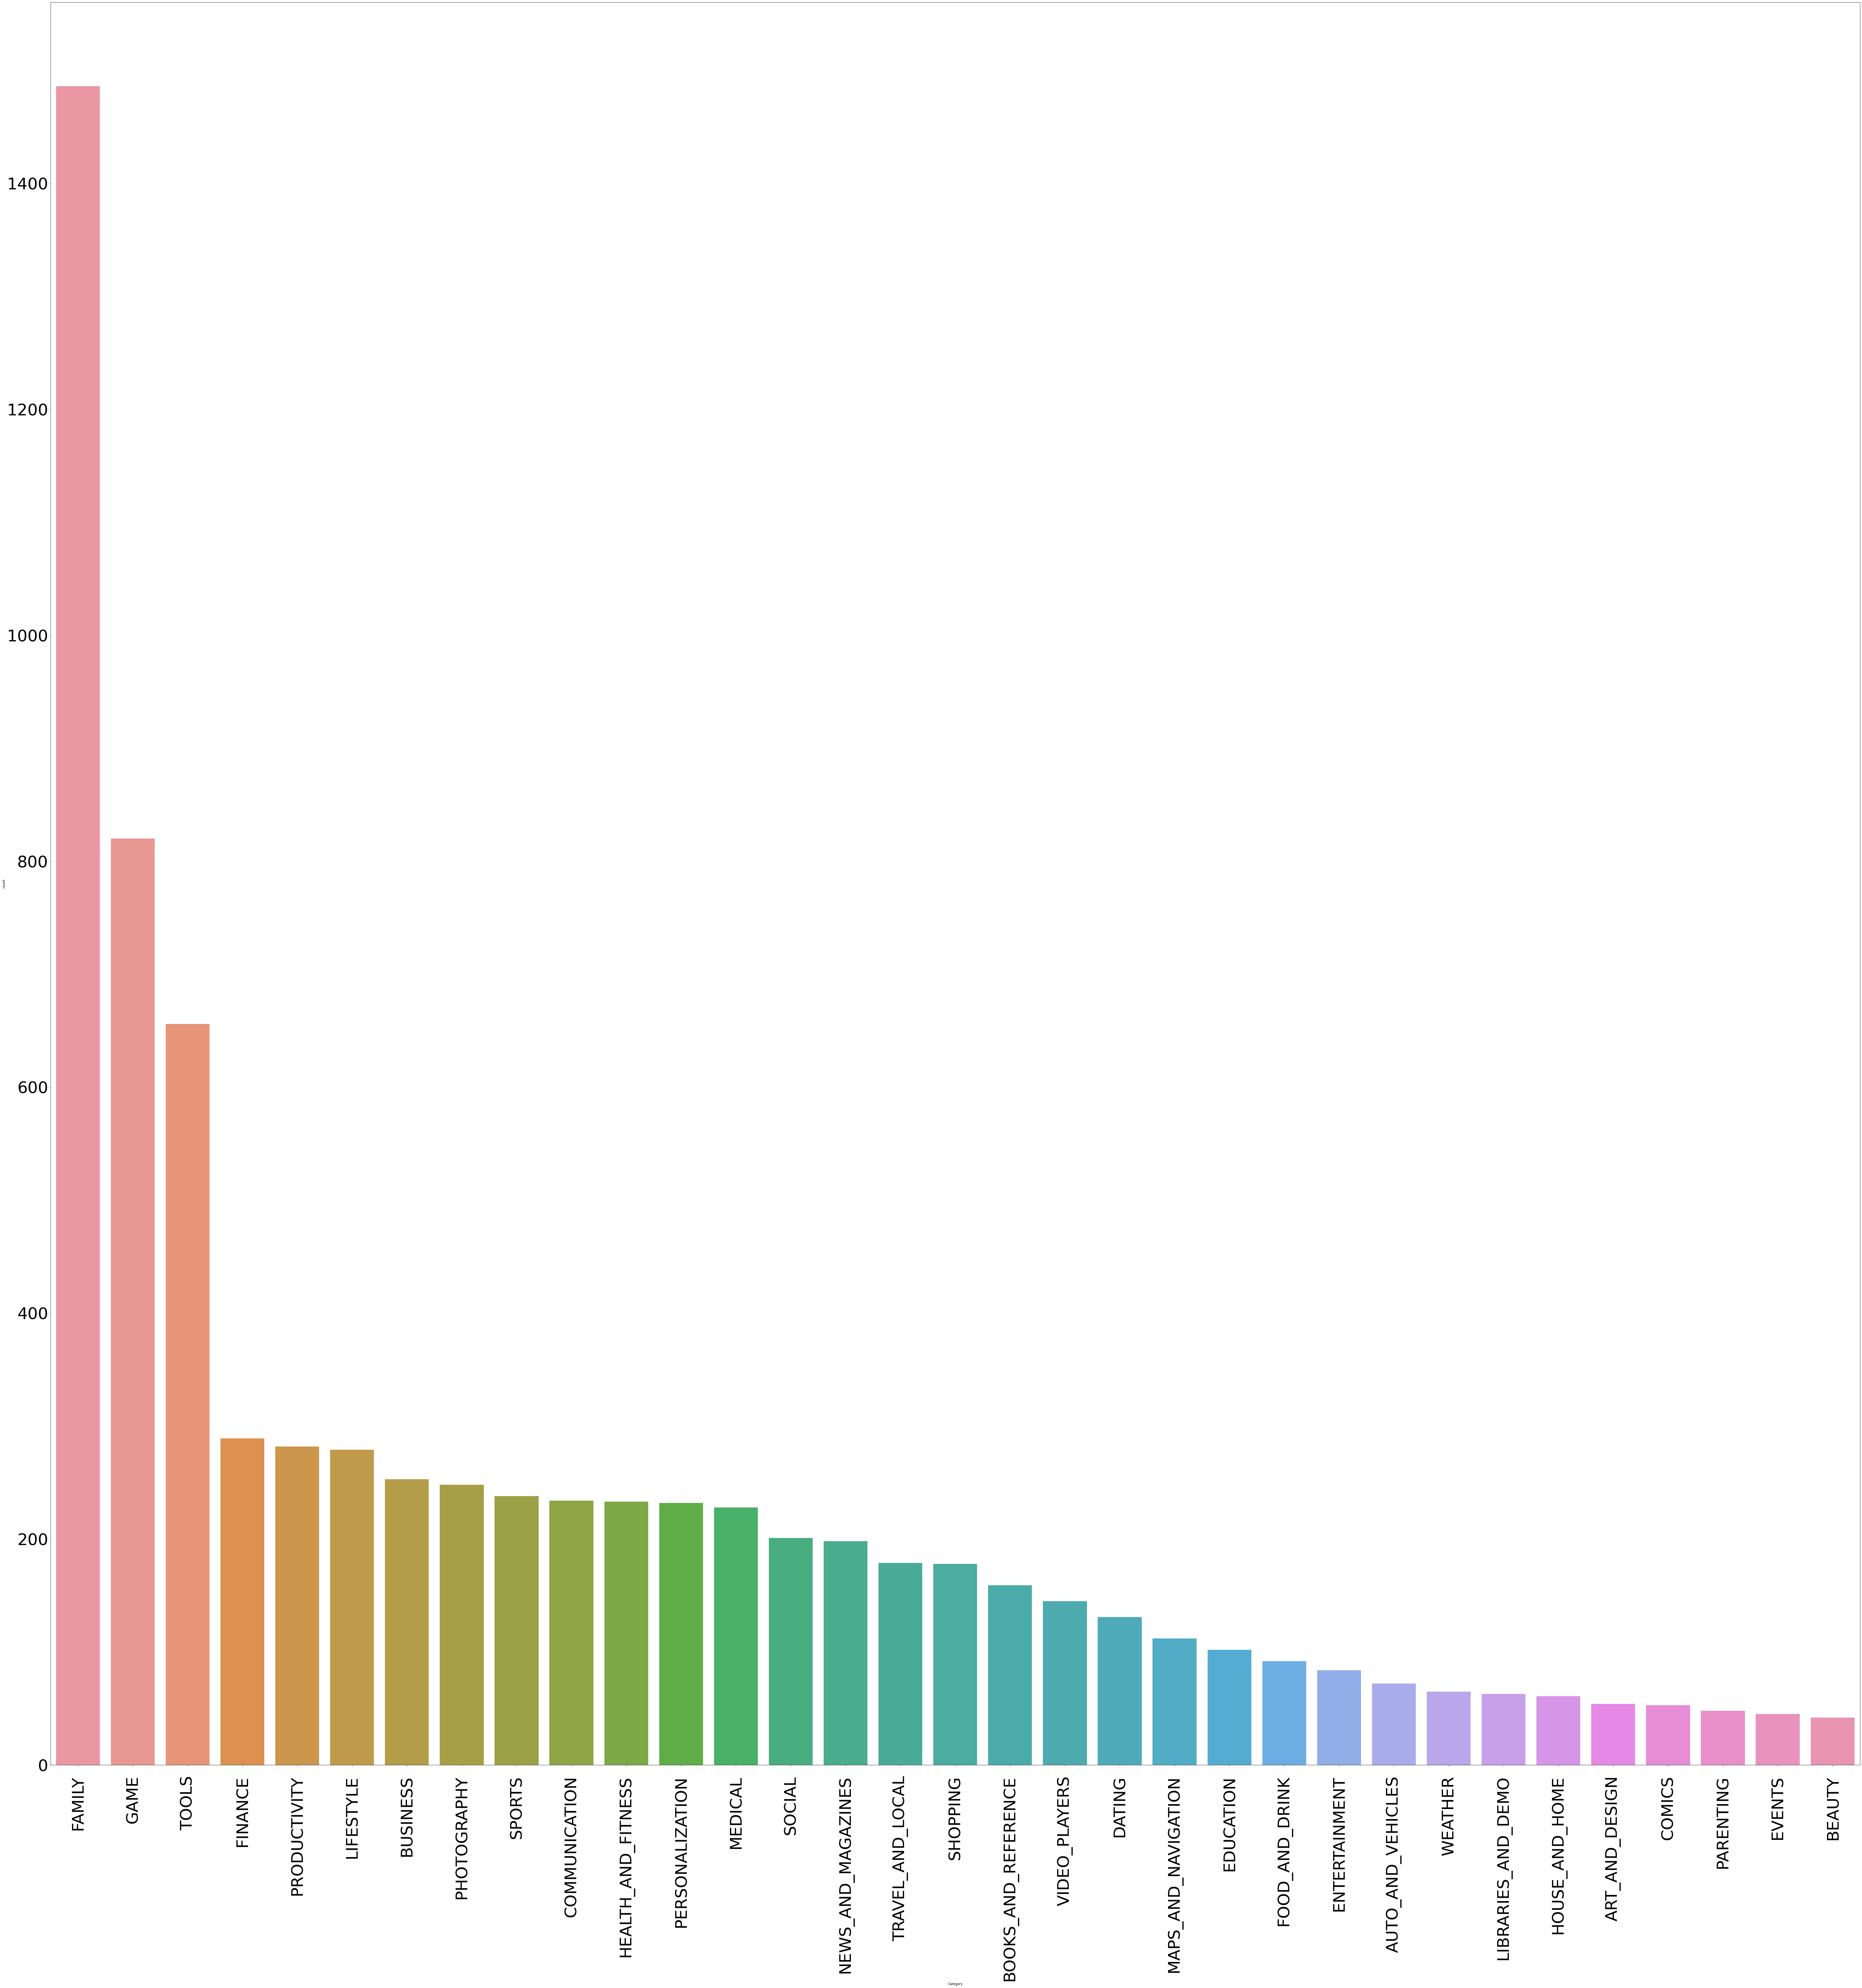

In [207]:
fig, ax = plt.subplots(figsize=(100, 100))


ax.tick_params(axis = 'x', pad=30,labelsize = 50,labelrotation = 90)
ax.tick_params(axis = 'y',labelsize = 50)


# 

sns.countplot(ax = ax, x = google_free['Category'],order = google_free['Category'].value_counts().index)

In [211]:
google_free

,App,Category,Rating,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...
9247,EC SPORTS,SPORTS,5.0,1,6.3M,10+,Everyone,Sports,"May 26, 2015",4.1.1,2.3.3 and up
9251,EC Reps,BUSINESS,4.0,1,5.4M,100+,Everyone,Business,"March 15, 2017",1.10,4.0 and up
7139,CB Register,FAMILY,5.0,1,5.6M,10+,Everyone,Entertainment,"June 27, 2018",1.0,4.1 and up
7122,CB Fit,HEALTH_AND_FITNESS,5.0,1,7.8M,10+,Everyone,Health & Fitness,"July 9, 2018",4.2.2,4.1 and up


In [222]:
google_free['Installs'] = [i.replace(',', '') for i in google_free['Installs']]
google_free['Installs'] = [i.replace('+', '') for i in google_free['Installs']]
google_free['Installs'] = google_free['Installs'].astype('int')


AttributeError: 'int' object has no attribute 'replace'

In [231]:
google_free.sort_values(by=['Installs'],ascending= False)
 

,App,Category,Rating,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,Varies with device,1000000000,Teen,Social,"July 26, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6M,5,Everyone,Medical,"August 2, 2018",2.0,4.0 and up
8146,CZ-Help,BOOKS_AND_REFERENCE,5.0,2,1.4M,5,Everyone,Books & Reference,"July 13, 2018",0.1,4.4 and up
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7.1M,5,Everyone,Medical,"August 3, 2018",1.0.51.0.3,8.0 and up
9218,EB Cash Collections,BUSINESS,5.0,1,4.3M,5,Everyone,Business,"July 31, 2018",1.10,4.4 and up
